In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deep Learning Project/Walmart Data Analysis and Forcasting.csv") # Remove the extra 'df=' and nested pd.read_csv() call.
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.dtypes

,0
Store,int64
Date,object
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
# Adding Temporal feature for our model
df['Year'] = pd.to_datetime(df['Date'] ,format='%d-%m-%Y').dt.year
df['Month'] = pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.month
df['WeekOfYear'] = pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.isocalendar().week
df['DayOfWeek'] = pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek,IsWeekend
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4,0
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,4,0
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,4,0
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,4,0
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4,0


In [ ]:
# df = df.drop('Date', axis="columns")

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek,IsWeekend
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4,0
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,4,0
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,4,0
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,4,0
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,4,0
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,4,0
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,4,0
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,4,0


In [ ]:
df.Store.value_counts().head() # Which means every store has 143 data entry.

,count
Store,
1,143
24,143
26,143
27,143
28,143


In [ ]:
scaler = MinMaxScaler()

In [ ]:
df[['Temperature', 'Fuel_Price', 'CPI','Unemployment']] = scaler.fit_transform(df[['Temperature','Fuel_Price','CPI','Unemployment']])

In [ ]:

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek,IsWeekend
0,1,05-02-2010,1643690.90,0,0.434149,0.050100,0.840500,0.405118,2010,2,5,4,0
1,1,12-02-2010,1641957.44,1,0.396967,0.038076,0.841941,0.405118,2010,2,6,4,0
2,1,19-02-2010,1611968.17,0,0.410861,0.021042,0.842405,0.405118,2010,2,7,4,0
3,1,26-02-2010,1409727.59,0,0.476419,0.044589,0.842707,0.405118,2010,2,8,4,0
4,1,05-03-2010,1554806.68,0,0.475147,0.076653,0.843008,0.405118,2010,3,9,4,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df = df.sort_values(by=['Store', 'Date'])
df['Weekly_Sales_Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Weekly_Sales_MA_4'] = df.groupby('Store')['Weekly_Sales'].rolling(window=4).mean().reset_index(level=0, drop=True)
df.fillna(0, inplace=True)

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek,IsWeekend,Weekly_Sales_Lag_1,Weekly_Sales_MA_4
0,1,2010-02-05,1643690.90,0,0.434149,0.050100,0.840500,0.405118,2010,2,5,4,0,0.00,0.000
1,1,2010-02-12,1641957.44,1,0.396967,0.038076,0.841941,0.405118,2010,2,6,4,0,1643690.90,0.000
2,1,2010-02-19,1611968.17,0,0.410861,0.021042,0.842405,0.405118,2010,2,7,4,0,1641957.44,0.000
3,1,2010-02-26,1409727.59,0,0.476419,0.044589,0.842707,0.405118,2010,2,8,4,0,1611968.17,1576836.025
4,1,2010-03-05,1554806.68,0,0.475147,0.076653,0.843008,0.405118,2010,3,9,4,0,1409727.59,1554614.970


In [ ]:
df.corr(numeric_only = True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,WeekOfYear,DayOfWeek,IsWeekend,Weekly_Sales_Lag_1,Weekly_Sales_MA_4
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,3.474318e-12,2.910676e-15,3.106283e-15,NaN,NaN,-0.330296,-0.326639
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.837754e-02,7.614332e-02,7.421127e-02,NaN,NaN,0.934856,0.927929
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-5.678257e-02,1.229958e-01,1.277427e-01,NaN,NaN,0.067707,-0.010749
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.426923e-02,2.358618e-01,2.361833e-01,NaN,NaN,-0.048074,-0.011909
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,7.794703e-01,-4.215590e-02,-3.240300e-02,NaN,NaN,0.025815,0.065541
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,7.479573e-02,4.979672e-03,6.041530e-03,NaN,NaN,-0.070074,-0.066779
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.418135e-01,-1.274559e-02,-1.589158e-02,NaN,NaN,-0.108479,-0.118810
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000e+00,-1.944645e-01,-1.819189e-01,NaN,NaN,-0.004742,0.041778
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,-1.944645e-01,1.000000e+00,9.959843e-01,NaN,NaN,0.097858,0.095356
WeekOfYear,3.106283e-15,0.074211,1.277427e-01,0.236183,-0.032403,0.006042,-0.015892,-1.819189e-01,9.959843e-01,1.000000e+00,NaN,NaN,0.100841,0.096959


[]

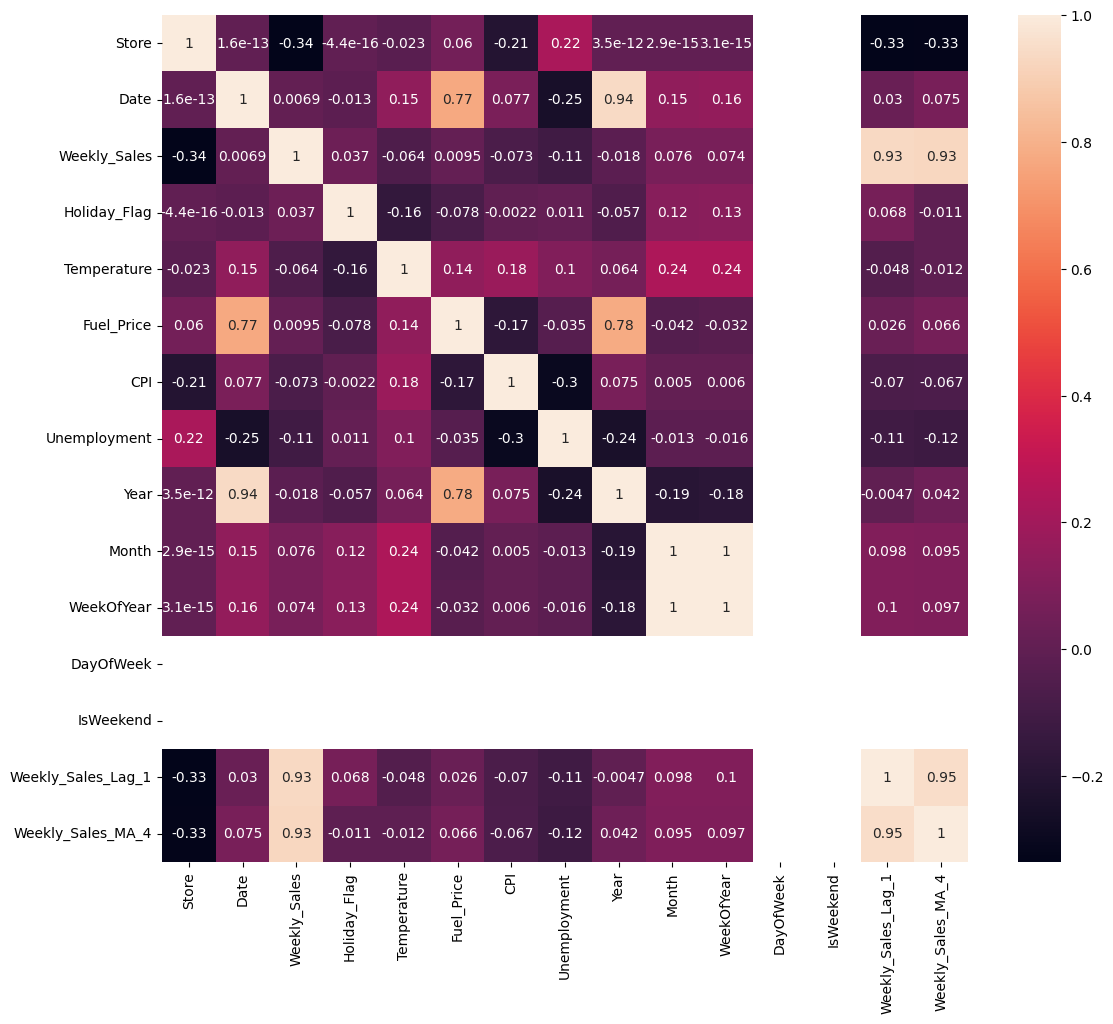

In [ ]:
plt.figure(figsize=(13, 11))
sns.heatmap(df.corr(), annot=True)
plt.plot()

In [ ]:
df1 = df.copy()
X = df1.drop(['Store','Weekly_Sales','Date'], axis=1)
Y = df['Weekly_Sales']

In [ ]:
X.columns

Index(['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Year', 'Month', 'WeekOfYear', 'DayOfWeek', 'IsWeekend',
       'Weekly_Sales_Lag_1', 'Weekly_Sales_MA_4'],
      dtype='object')

In [ ]:
Y.head()

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
!pip install tensorflow scikit-learn


In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Assuming df is your preprocessed DataFrame
# Define features and target variable
features = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
            'Year', 'Month', 'WeekOfYear', 'DayOfWeek', 'IsWeekend',
            'Weekly_Sales_Lag_1', 'Weekly_Sales_MA_4']
X = df[features].values
y = df['Weekly_Sales'].values

In [ ]:

# Convert X and y to float32
X = X.astype(np.float32)  # Convert features to float32
y = y.astype(np.float32)  # Convert target to float32


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 1349914853376.0000
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 345146195968.0000
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 156439740416.0000
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 157389537280.0000
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 163413377024.0000
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 165248024576.0000
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 158567596032.0000
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164312121344.0000
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 152705482752.0000
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 152667897856.0000
Epoch 11/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 163448094720.0000
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 148440645632.0000
Epoch 13/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [ ]:
# Make predictions
y_pred_lstm = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
# Evaluate the model
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
lstm_r2 = r2_score(y_test, y_pred_lstm)

In [ ]:
print(f"LSTM RMSE: {lstm_rmse:.2f}")
print(f"LSTM R²: {lstm_r2:.2f}")

LSTM RMSE: 107846.70
LSTM R²: 0.92


In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Deep Learning Project/lstm_model.keras')

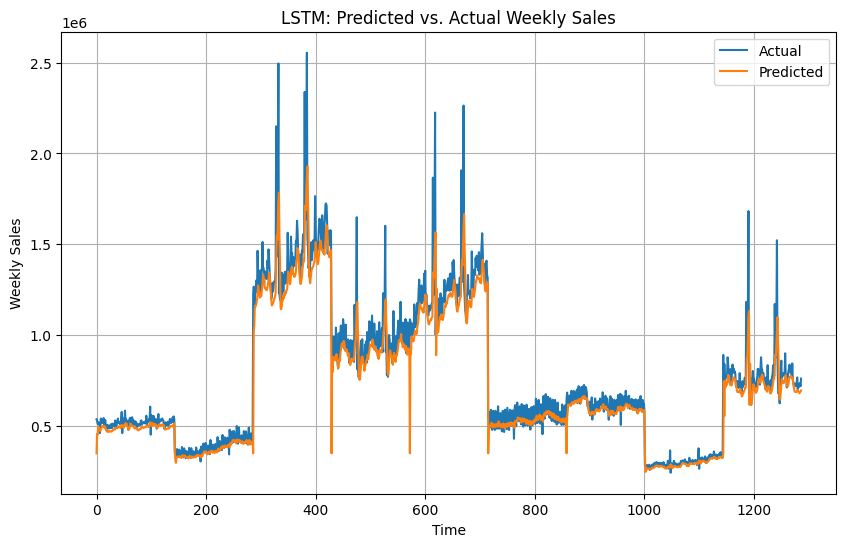

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have y_test (actual values) and y_pred_lstm (predicted values)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.title('LSTM: Predicted vs. Actual Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 152593186816.0000
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145323425792.0000
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 147782909952.0000
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 152828493824.0000
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 134154215424.0000
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 143712272384.0000
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 159851446272.0000
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 145080745984.0000
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 141626425344.0000
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 138568368128.0000


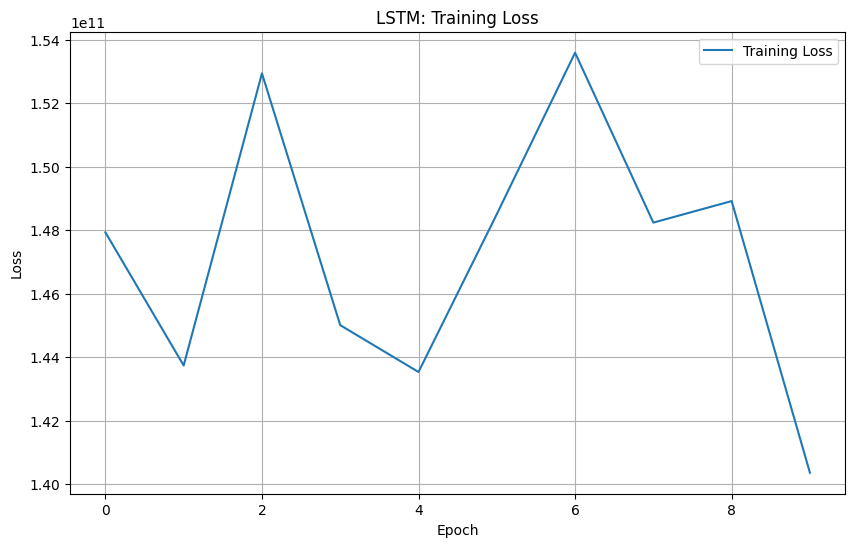

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)  # Replace with your actual training parameters


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Corrected line
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM: Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# **TRANSFORMER MODEL**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LayerNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import r2_score


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LayerNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import r2_score

# Define Temporal Transformer Model
def create_temporal_transformer_model(input_shape, num_heads=4, d_model=12, ff_dim=128, num_layers=2, dropout_rate=0.1): # Changed d_model to 12
    inputs = Input(shape=input_shape)
    x = inputs

    # Add Transformer layers
    for _ in range(num_layers):
        x = TransformerEncoder(num_heads, d_model, ff_dim, rate=dropout_rate)(x)

    # Pooling and Output
    # Use GlobalAveragePooling1D layer from Keras
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)  # Single output for regression

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# Set input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Create the model
model = create_temporal_transformer_model(input_shape=input_shape)
# Create the model with adjusted hyperparameters
model = create_temporal_transformer_model(
input_shape=input_shape,
num_heads=8,  # Increased number of heads
d_model=24,   # Increased hidden dimension
ff_dim=256,   # Increased feedforward dimension
num_layers=3,  # Increased number of layers
dropout_rate=0.2  # Increased dropout rate
)

# Compile the model
model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(MeanSquaredError()(y_test, predictions).numpy())
r2 = r2_score(y_test, predictions)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Optional: Print predictions
# print("Predictions:", predictions)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:1331: UserWarning: Layer 'transformer_encoder_15' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''Dimensions must be equal, but are 12 and 24 for '{{node add_1}} = AddV2[T=DT_FLOAT](layer_normalization_30_1/add_2, sequential_17_1/dense_37_1/Add)' with input shapes: [?,1,12], [?,1,24].''
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()

ValueError: Exception encountered when calling TransformerEncoder.call().

[1mCould not automatically infer the output shape / dtype of 'transformer_encoder_15' (of type TransformerEncoder). Either the `TransformerEncoder.call()` method is incorrect, or you need to implement the `TransformerEncoder.compute_output_spec() / compute_output_shape()` method. Error encountered:

Dimensions must be equal, but are 12 and 24 for '{{node add_1}} = AddV2[T=DT_FLOAT](layer_normalization_30_1/add_2, sequential_17_1/dense_37_1/Add)' with input shapes: [?,1,12], [?,1,24].[0m

Arguments received by TransformerEncoder.call():
  • args=('<KerasTensor shape=(None, 1, 12), dtype=float32, sparse=None, name=keras_tensor_97>',)
  • kwargs=<class 'inspect._empty'>

In [ ]:
# Set input shape
input_shape = (X_train.shape[1], X_train.shape[2])

In [ ]:
# Create the model
model = create_temporal_transformer_model(input_shape=input_shape)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
